In [1]:
## Loading data loansmall.csv
import pandas as pd 
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
 
Location = "loansmall.csv"
df = pd.read_csv(Location)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.shape

(194111, 74)

In [3]:
# Many columns have only NAs in them (194111 per column)
# Drop all columns with all-missing data in all rows, first 

df1=df.dropna(axis=1,how='all')
df1.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [4]:
# Created new dataframe containing columns that I found to be relevant for the analysis. 
# There might be others...

df2 = df1.filter(['loan_amnt', 'int_rate','installment', 'grade', 'emp_length','home_ownership','annual_inc','purpose', 'total_acc', 'addr_state', 'delinq_2yrs', 'pub_rec','revol_bal', 'revol_util', 'acc_now_delinq', 'tot_cur_bal', 'tot_coll_amt']
, axis=1)
df2.head(3)

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,purpose,total_acc,addr_state,delinq_2yrs,pub_rec,revol_bal,revol_util,acc_now_delinq,tot_cur_bal,tot_coll_amt
0,5000,10.65,162.87,B,10+ years,RENT,24000.0,credit_card,9.0,AZ,0.0,0.0,13648,83.7,0.0,NaN,NaN
1,2500,15.27,59.83,C,< 1 year,RENT,30000.0,car,4.0,GA,0.0,0.0,1687,9.4,0.0,NaN,NaN
2,2400,15.96,84.33,C,10+ years,RENT,12252.0,small_business,10.0,IL,0.0,0.0,2956,98.5,0.0,NaN,NaN


In [5]:
# Change "grade" to numeric
def score_to_numeric(x):
    if x=='A':
        return 1
    if x=='B':
        return 2
    if x=='C':
        return 3
    if x=='D':
        return 4
    if x=='E':
        return 5
    if x=='F':
        return 6
    if x=='G':
        return 7
 

In [6]:
# Change "emp_length" to numeric
def empl_to_numeric(x):
    if x=='< 1 year':
        return 0
    if x=='1 year' :
        return 1
    if x=='2 years':
        return 2
    if x=='3 years':
        return 3
    if x=='4 years':
        return 4
    if x=='5 years':
        return 5
    if x=='6 years':
        return 6
    if x=='7 years':
        return 7
    if x=='8 years':
        return 8
    if x=='9 years':
        return 9
    if x=='10+ years':
        return 10

In [7]:
# Change "home_ownership" to numeric
def own_to_numeric(x):
    if x=='MORTGAGE':
        return 1
    if x=='RENT':
        return 2
    if x=='OWN':
        return 3

In [8]:
df2['grade_val'] = df2['grade'].apply(score_to_numeric)
df2['empl_val'] = df2['emp_length'].apply(empl_to_numeric)
df2['own_val'] = df2['home_ownership'].apply(own_to_numeric)
df2.head(3)

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,purpose,total_acc,addr_state,delinq_2yrs,pub_rec,revol_bal,revol_util,acc_now_delinq,tot_cur_bal,tot_coll_amt,grade_val,empl_val,own_val
0,5000,10.65,162.87,B,10+ years,RENT,24000.0,credit_card,9.0,AZ,0.0,0.0,13648,83.7,0.0,NaN,NaN,2,10.0,2.0
1,2500,15.27,59.83,C,< 1 year,RENT,30000.0,car,4.0,GA,0.0,0.0,1687,9.4,0.0,NaN,NaN,3,0.0,2.0
2,2400,15.96,84.33,C,10+ years,RENT,12252.0,small_business,10.0,IL,0.0,0.0,2956,98.5,0.0,NaN,NaN,3,10.0,2.0


In [9]:
# There are 4 NAs in the annual_inc column. 
# So I create a new data frame that drops those 4 rows 
# because I want to plot a histogram by annual income further down

df3 = df2[df2['annual_inc'].notnull()]
#df3.head()

df3MD = df3[df3["addr_state"]=="MD"]
#df3MD.head()

In [10]:
df3.corr()

,loan_amnt,int_rate,installment,annual_inc,total_acc,delinq_2yrs,pub_rec,revol_bal,revol_util,acc_now_delinq,tot_cur_bal,tot_coll_amt,grade_val,empl_val,own_val
loan_amnt,1.000000,0.193496,0.950587,0.336186,0.251092,0.014527,-0.067614,0.304415,0.117692,0.012936,0.313434,-0.021526,0.168211,0.141500,-0.176725
int_rate,0.193496,1.000000,0.179715,-0.022616,-0.022992,0.104400,0.068237,0.002304,0.384025,0.038024,-0.145498,0.009833,0.937341,0.030383,0.086338
installment,0.950587,0.179715,1.000000,0.335329,0.234327,0.028524,-0.055784,0.298676,0.149244,0.016577,0.277573,-0.020314,0.147694,0.125245,-0.144202
annual_inc,0.336186,-0.022616,0.335329,1.000000,0.232858,0.058822,-0.023629,0.323410,0.029110,0.013489,0.488271,-0.002302,-0.014102,0.077554,-0.167264
total_acc,0.251092,-0.022992,0.234327,0.232858,1.000000,0.124981,-0.014190,0.215376,-0.072891,0.025808,0.329224,0.025060,-0.033550,0.137745,-0.215413
delinq_2yrs,0.014527,0.104400,0.028524,0.058822,0.124981,1.000000,-0.022062,-0.024949,-0.013675,0.116333,0.078147,0.004048,0.095672,0.032205,-0.038516
pub_rec,-0.067614,0.068237,-0.055784,-0.023629,-0.014190,-0.022062,1.000000,-0.078168,-0.024628,0.006855,-0.063894,0.033895,0.050117,0.041140,-0.001959
revol_bal,0.304415,0.002304,0.298676,0.323410,0.215376,-0.024949,-0.078168,1.000000,0.197625,0.001881,0.421938,-0.025072,0.002126,0.098959,-0.129878
revol_util,0.117692,0.384025,0.149244,0.029110,-0.072891,-0.013675,-0.024628,0.197625,1.000000,-0.015073,0.043036,-0.039535,0.343420,0.058818,-0.015540
acc_now_delinq,0.012936,0.038024,0.016577,0.013489,0.025808,0.116333,0.006855,0.001881,-0.015073,1.000000,0.022861,0.002696,0.032010,0.009445,-0.008837


I did not find much of a correlation that stands out between int_rate with other factors, 
except maybe for the revol_util.
The correlation pattern in Maryland is simillar to that nationwide, so MD is a good sample data.  

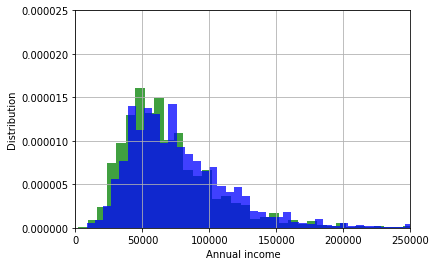

In [11]:
# Explore the distribution of incomes nationwide and in Maryland using histogram

x=df3['annual_inc']
xmd=df3MD['annual_inc']
n1, bins1, patches1 = plt.hist(x, 1000, normed=1, facecolor='green', alpha=0.75)
n2, bins2, patches2 = plt.hist(xmd, 1000, normed=1, facecolor='blue', alpha=0.75)

plt.xlabel('Annual income')
plt.ylabel('Distribution')

plt.axis([0, 250000, 0, 0.000025])
plt.grid(True)

plt.show() 

In [12]:
# Created a pivot table to show the averages for the various parameters
# by loan grade in MD

tableMD = pd.pivot_table(df3MD, values=['int_rate', 'loan_amnt', 'annual_inc', 'delinq_2yrs', 'pub_rec', 'revol_bal'], index=['grade'],
                    aggfunc={'int_rate': np.mean,
                             'annual_inc':  [min, max, np.mean]})
tableMD.head() 

annual_inc                          int_rate
             max          mean      min       mean
grade                                             
A      1080000.0  90474.690256  13800.0   7.608030
B      6100000.0  82189.693844   9600.0  11.695760
C      1176000.0  76714.958246   9600.0  15.141812
D       358680.0  74945.008158   8520.0  17.906798
E       480000.0  80250.550212  11000.0  20.508568

In [13]:
# Note that there are guys in MD with > $ 1 million income, reaching to 6 mil.
# I am pulling those guys out, to see why some of them have only grade B & C loans.

rich_guys_data=df3MD[(df3MD['annual_inc'] == 1080000) | (df3MD['annual_inc'] == 6100000) | (df3MD['annual_inc'] == 1176000)]
rich_guys_data.head()

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,purpose,total_acc,addr_state,delinq_2yrs,pub_rec,revol_bal,revol_util,acc_now_delinq,tot_cur_bal,tot_coll_amt,grade_val,empl_val,own_val
27633,5600,13.61,129.18,C,10+ years,MORTGAGE,1176000.0,other,25.0,MD,1.0,0.0,11753,73.5,0.0,NaN,NaN,3,10.0,1.0
28975,4500,7.88,90.99,A,8 years,MORTGAGE,1080000.0,major_purchase,20.0,MD,0.0,0.0,46337,1.9,0.0,NaN,NaN,1,8.0,1.0
169235,30000,12.12,998.15,B,10+ years,MORTGAGE,6100000.0,debt_consolidation,19.0,MD,0.0,0.0,15219,94.5,0.0,329254.0,0.0,2,10.0,1.0


In [14]:
#It appears that the 'revol_util' plays an important role in the grade/int_rate of the loan.!
# Correlation analysis
df3MD.corr()

,loan_amnt,int_rate,installment,annual_inc,total_acc,delinq_2yrs,pub_rec,revol_bal,revol_util,acc_now_delinq,tot_cur_bal,tot_coll_amt,grade_val,empl_val,own_val
loan_amnt,1.000000,0.222897,0.949909,0.186458,0.233688,-0.003058,-0.089026,0.263161,0.117662,0.011458,0.293040,-0.043979,0.186505,0.156695,-0.176158
int_rate,0.222897,1.000000,0.202326,-0.030964,0.018741,0.111584,0.085844,0.002387,0.383828,0.026422,-0.172126,0.013751,0.934121,0.031661,0.089961
installment,0.949909,0.202326,1.000000,0.189177,0.218212,0.005950,-0.079115,0.254876,0.140430,0.009040,0.249269,-0.033435,0.161771,0.134674,-0.145811
annual_inc,0.186458,-0.030964,0.189177,1.000000,0.131906,0.019460,-0.020557,0.163745,0.041492,0.002079,0.233238,-0.011419,-0.026388,0.075925,-0.129655
total_acc,0.233688,0.018741,0.218212,0.131906,1.000000,0.148152,-0.017806,0.225620,-0.043721,0.041740,0.346692,0.016236,0.004124,0.186971,-0.236908
delinq_2yrs,-0.003058,0.111584,0.005950,0.019460,0.148152,1.000000,-0.016937,-0.038115,-0.004604,0.122629,0.113036,0.006225,0.105877,0.069440,-0.073438
pub_rec,-0.089026,0.085844,-0.079115,-0.020557,-0.017806,-0.016937,1.000000,-0.109837,-0.062333,-0.003826,-0.097656,0.052767,0.080530,0.027319,0.042131
revol_bal,0.263161,0.002387,0.254876,0.163745,0.225620,-0.038115,-0.109837,1.000000,0.173369,0.007026,0.379627,-0.024313,0.008482,0.126405,-0.142532
revol_util,0.117662,0.383828,0.140430,0.041492,-0.043721,-0.004604,-0.062333,0.173369,1.000000,-0.022132,0.074825,-0.064877,0.344175,0.062738,-0.029372
acc_now_delinq,0.011458,0.026422,0.009040,0.002079,0.041740,0.122629,-0.003826,0.007026,-0.022132,1.000000,0.036308,-0.007379,0.019089,-0.009759,-0.024393


In [15]:
#Looks like the interest rate has a fair correlation with the revol_util 
#(total credit line utilized rate) and to loan_amnt, for a correl factor of > 0.2
# Do a regression analysis 

import statsmodels.formula.api as sm
result = sm.ols(formula='int_rate ~ revol_util + loan_amnt -1', data=df3MD).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               int_rate   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                 1.709e+04
Date:                Thu, 25 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:28:59   Log-Likelihood:                -14096.
No. Observations:                4619   AIC:                         2.820e+04
Df Residuals:                    4617   BIC:                         2.821e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
revol_util     0.1584      0.002     75.720      0.000       0.154       0.162
loan_amnt      0.0003   7.77e-06     35.779      0.000       0.000       0.000
==============================================================================
Omnibus:                      105.717   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.431
Skew:                           0.351   Prob(JB):                     8.60e-26
Kurtosis:                       3.325   Cond. No.                         465.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Select a fraction of the data for plotting

fraction_df3MD = df3MD.sample(frac = 0.04, axis=0)

Text(0,0.5,'Interest rate in MD')

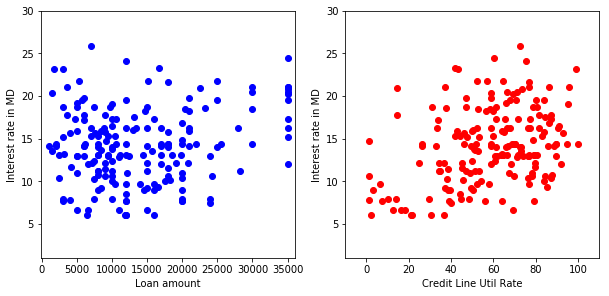

In [18]:
x1=fraction_df3MD.loan_amnt
x2=fraction_df3MD.revol_util
y=fraction_df3MD.int_rate

fig, ax = plt.subplots(1, 2, figsize=(10,10))
#plt.figure(1)                # the first figure
plt.subplot(221)             # the first subplot in the first figure
plt.plot(x1, y, 'bo')
plt.axis([-100, 36000, 1, 30])
plt.xlabel('Loan amount')
plt.ylabel('Interest rate in MD')

plt.subplot (222)           # the second subplot in the first figure
plt.plot(x2, y, 'ro')
plt.axis([-10, 110, 1, 30])
plt.xlabel('Credit Line Util Rate')
plt.ylabel('Interest rate in MD')